In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics


import seaborn as sns
import graphviz
%matplotlib inline

Load the data, return first 5 records

In [2]:
df = pd.read_csv('churn.csv', sep = ',')
df.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Checking how many records and columns

In [4]:
df.shape

(3333, 21)

Checking missing values

In [5]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [6]:
df.isna().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

Checking data type

In [7]:
print("------  Data Types  ----- \n",df.dtypes)

------  Data Types  ----- 
 State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object


Checking duplicate rows

In [8]:
df[df.duplicated()]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?


Droppinging irrelevant columns

In [9]:
df = df.drop(['Phone'], axis = 1)

from the data description, we can see that phone number is unique - therefor it not provides us information we can learn. we will drop phone number column and enumerate all the categorial objects columns. enumeration advantage is for easier use of the algorithms witch often accept only numbers

## Plot for column 'churn' and get churn rate.

False.    2850
True.      483
Name: Churn?, dtype: int64


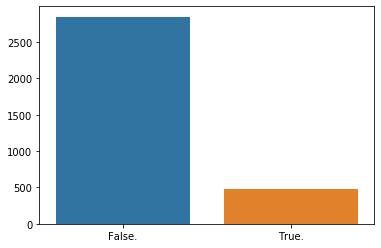

In [10]:
y = df['Churn?'].value_counts()
print(y)
sns.barplot(y.index, y.values)

In [34]:
churn_rate = (y[1] / df.shape[0])*100
print('Churn Rate:', churn_rate)

Churn Rate: 14.491449144914492


## Label Encoding for Categorical Variables

In [12]:
# transfer df.dtypes to a dictionary
dict(df.dtypes)

{'State': dtype('O'),
 'Account Length': dtype('int64'),
 'Area Code': dtype('int64'),
 "Int'l Plan": dtype('O'),
 'VMail Plan': dtype('O'),
 'VMail Message': dtype('int64'),
 'Day Mins': dtype('float64'),
 'Day Calls': dtype('int64'),
 'Day Charge': dtype('float64'),
 'Eve Mins': dtype('float64'),
 'Eve Calls': dtype('int64'),
 'Eve Charge': dtype('float64'),
 'Night Mins': dtype('float64'),
 'Night Calls': dtype('int64'),
 'Night Charge': dtype('float64'),
 'Intl Mins': dtype('float64'),
 'Intl Calls': dtype('int64'),
 'Intl Charge': dtype('float64'),
 'CustServ Calls': dtype('int64'),
 'Churn?': dtype('O')}

In [13]:
# find categorical variable which data type is 'O' form dictionary
categorical = [i for i in dict(df.dtypes) if dict(df.dtypes)[i] in ['O']]
categorical

['State', "Int'l Plan", 'VMail Plan', 'Churn?']

In [14]:
le = preprocessing.LabelEncoder()
for i in categorical: 
    le.fit(df[i])
    df[i] = le.transform(df[i])
df.head(5)

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [15]:
df['State'].unique()

array([16, 35, 31, 36,  1, 19, 24, 18, 49, 15, 39, 12, 26, 34, 13, 46, 45,
       43,  9,  5,  3, 40, 29, 50, 11, 14, 30, 10,  0, 20,  2, 48, 37, 22,
        8, 44,  4, 23, 41, 27, 47, 32, 33,  7, 17, 21, 25, 42, 38,  6, 28],
      dtype=int64)

'State' column is converted to numbers from 0 to 50;\
'Int'l Plan' column is converted by 'yes' = 1, 'no' = 0;\
'Vmail Plan' column is converted by 'yes' = 1, 'no' = 0;\
'Churn?' column is converted by 'True' = 1, 'False' = 0;

## Correlation Matrix

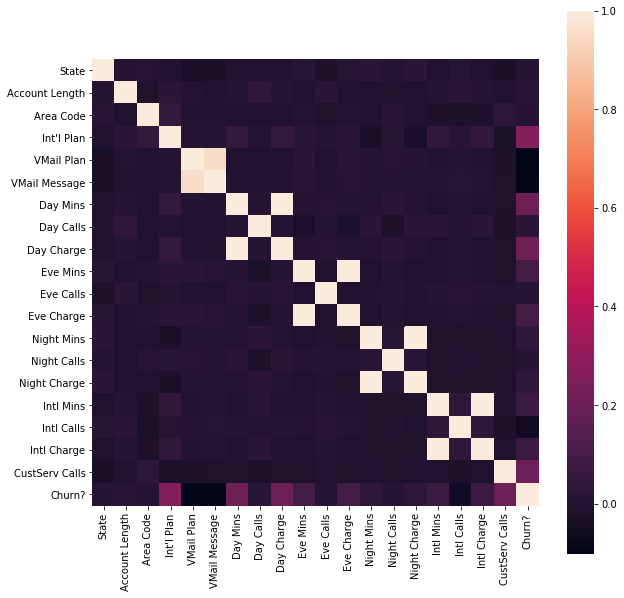

In [16]:
fig = plt.figure(figsize=(10,10))
corr = df.corr(method = 'pearson')
# plot
sns.heatmap(corr, vmax = 1, square = True)


we can see strong correlation between the features:\
total day/eve/night/intl charge - total day/eve/night/intl minutes we can assume they charge per call time.\
another correlation is between voice mail plan and number vmail mail massages.

correlation with churn:\
international plan, total day minutes, total day charge, customers service call

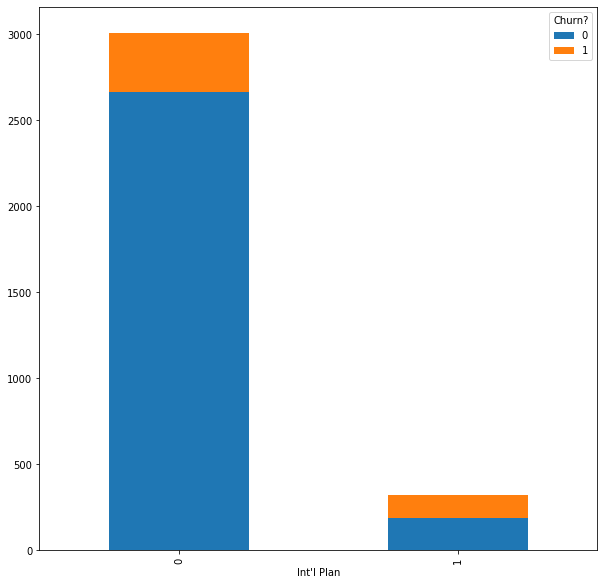

In [43]:
df.groupby(["Int'l Plan", "Churn?"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,10)) 

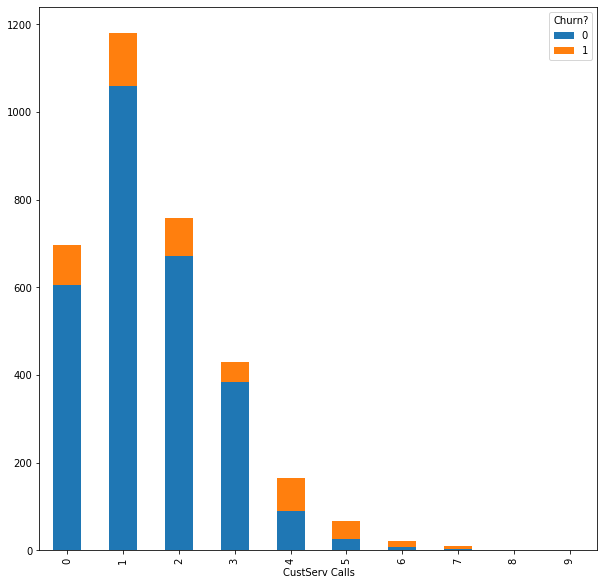

In [51]:
df.groupby(["CustServ Calls", "Churn?"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,10)) 

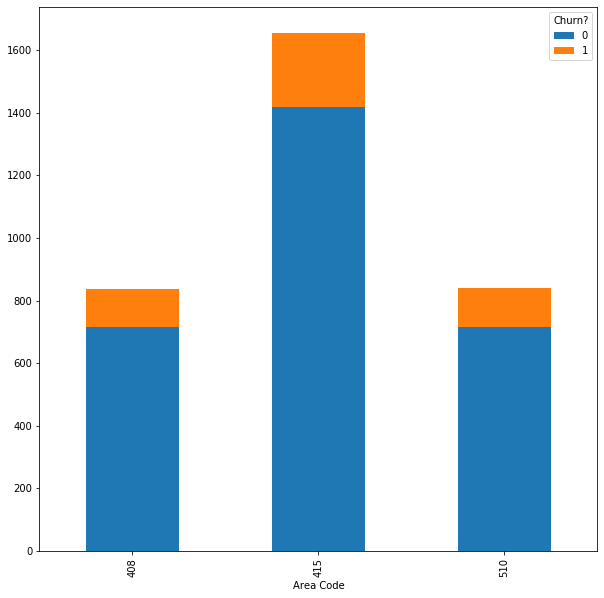

In [53]:
df.groupby(["Area Code", "Churn?"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,10)) 

## Develop a decison tree

Split dataset into training set and test set

In [17]:
# feature = df[["Int'l Plan", "Day Mins", "Day Charge", "CustServ Calls"]]
feature = df.columns[df.columns != 'Churn?']
# 70% training and 30% test, *random_state = 1*, stratified
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,feature], 
                                                    df['Churn?'], 
                                                    test_size=0.3, 
                                                    stratify = df['Churn?'], 
                                                    random_state = 1)

In [18]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)

Plot the tree

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= feature, # ["Int'l Plan", "Day Mins", "Day Charge", "CustServ Calls"], 
                                class_names= ["0", "1"],
                                filled=True)

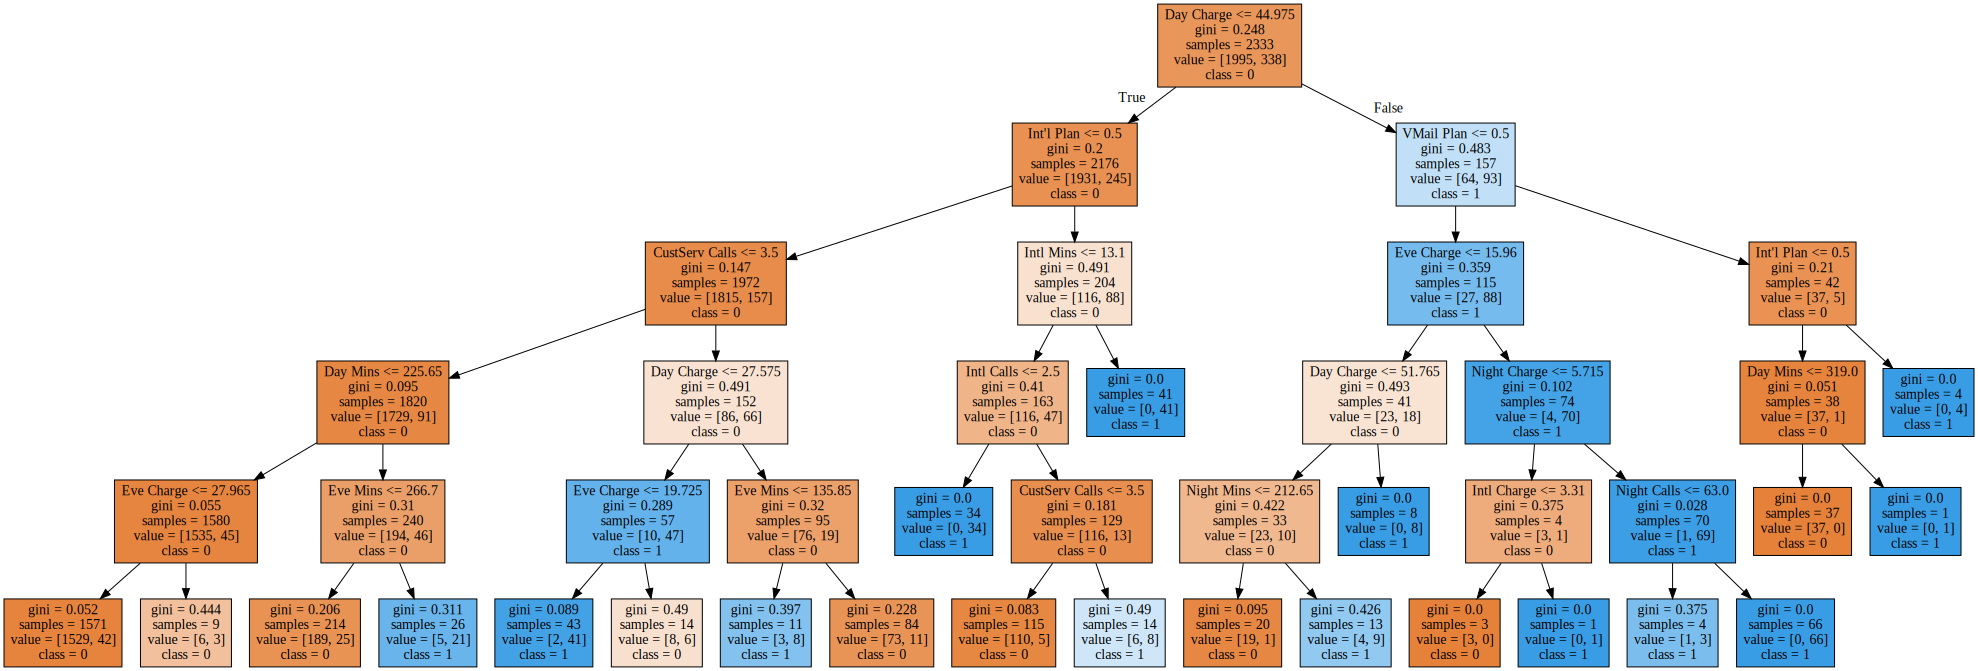

In [20]:
tree1 = graphviz.Source(dot_data, format="png") 
tree1

In [55]:
#Save pics
tree1.format = 'png'
tree1.view(filename='tree1', directory='C:/Users/zilin/Desktop/CIND119/assignment/project')

'C:/Users/zilin/Desktop/CIND119/assignment/project\\tree1.png'

In [22]:
# make the prdictions on the test set
y_pred = clf.predict(X_test)

In [23]:
cf = confusion_matrix(y_test, y_pred)
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

[[839  16]
 [ 52  93]]
TP:  93 , FP:  16 , TN:  839 , FN: 52


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       855
           1       0.85      0.64      0.73       145

    accuracy                           0.93      1000
   macro avg       0.90      0.81      0.85      1000
weighted avg       0.93      0.93      0.93      1000



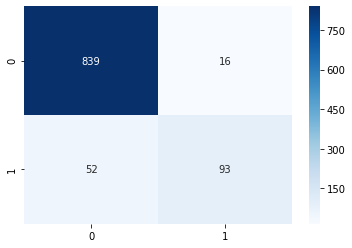

In [25]:
sns.heatmap(cf, annot = True, fmt="d", cmap="Blues")

In [56]:
feature = df[["Int'l Plan", "Day Mins", "Day Charge", "CustServ Calls", "Eve Mins", "Eve Charge", "Intl Mins", "Intl Charge"]]
# 70% training and 30% test, *random_state = 1*, stratified
X_train, X_test, y_train, y_test = train_test_split(feature, df['Churn?'], test_size=0.3, stratify = df['Churn?'], random_state = 1)

In [57]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)

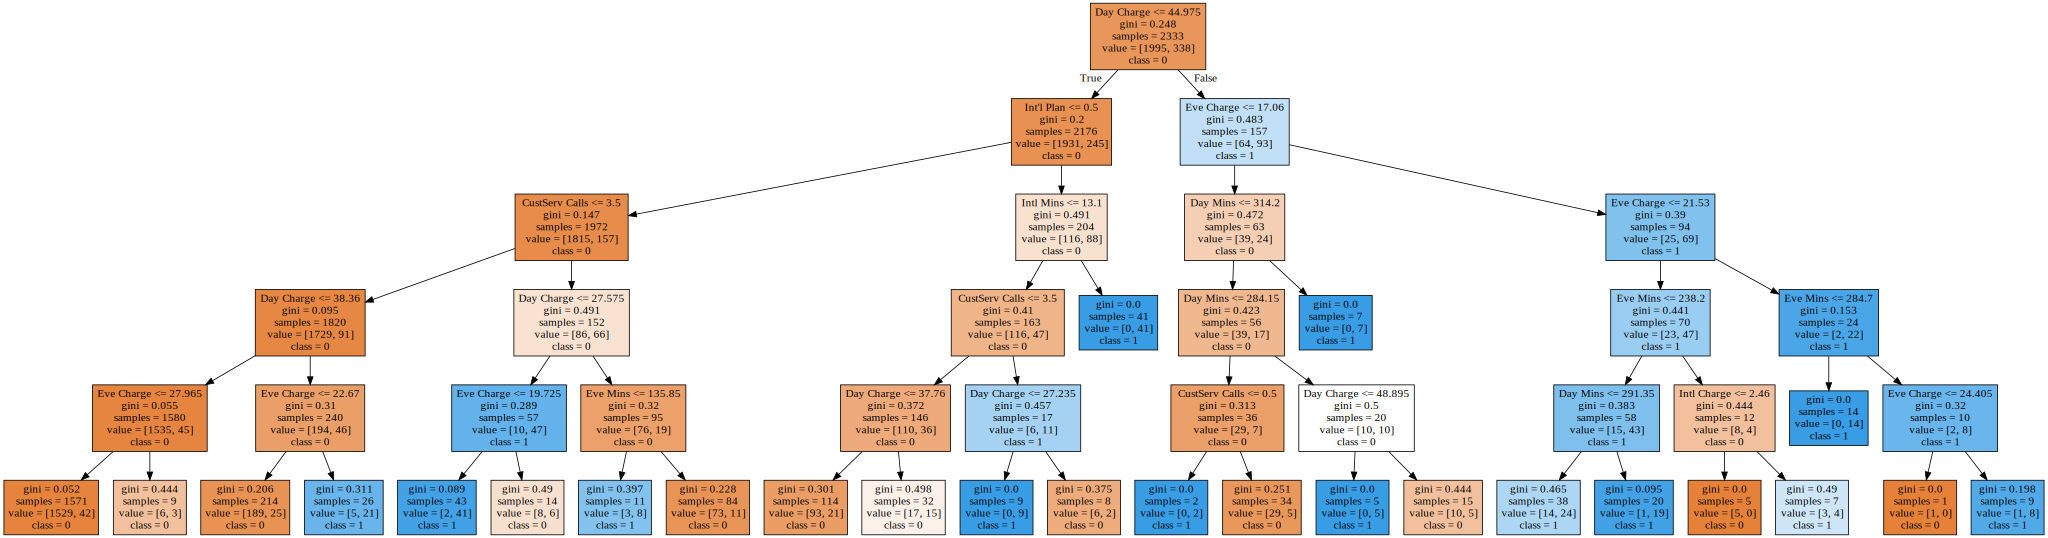

In [58]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= ["Int'l Plan", "Day Mins", "Day Charge", "CustServ Calls", "Eve Mins", "Eve Charge", "Intl Mins", "Intl Charge"], 
                                class_names= ["0", "1"],
                               filled=True)
tree2 = graphviz.Source(dot_data, format="png") 
tree2

In [59]:
# Save pics
tree2.format = 'png'
tree2.view(filename='tree2', directory='C:/Users/zilin/Desktop/CIND119/assignment/project')

'C:/Users/zilin/Desktop/CIND119/assignment/project\\tree2.png'

In [60]:
# make the prdictions on the test set
y_pred = clf.predict(X_test)

In [61]:
cf = confusion_matrix(y_test, y_pred)
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

[[839  16]
 [ 75  70]]
TP:  70 , FP:  16 , TN:  839 , FN: 75


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       855
           1       0.81      0.48      0.61       145

    accuracy                           0.91      1000
   macro avg       0.87      0.73      0.78      1000
weighted avg       0.90      0.91      0.90      1000



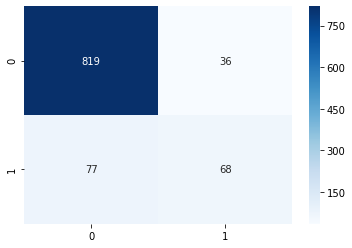

In [33]:
sns.heatmap(cf, annot = True, fmt="d", cmap="Blues")